In [17]:
import requests
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd

                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((301997.266 -4082816.606, 302016.825 ...  -36.867678  -36.870725   

    bbox_east   bbox_west   place_id osm_type    osm_id        lat  \
0  174.779537  174.778569  118523389      way  48383821 -36.869262   

          lon                                       display_name    class  \
0  174.778972  Newmarket, Joseph Banks Terrace, Newmarket, Au...  railway   

      type  importance  
0  station    0.460255  


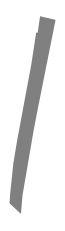

In [18]:
# Find Auckland location from osmx package
city = ox.geocode_to_gdf("NewMarket, Auckland, NZ")
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc="gray", ec="none")
_ = ax.axis("off")
print(city_proj)

In [20]:
gdf = ox.geometries.geometries_from_point((-36.8679152, 174.7774390),tags={'amenity':True,'shop':True},dist=100)
gdf.drop(['addr:housenumber', 'addr:street',
          'phone','website',
          'wheelchair','addr:city',
          'payment:coins','brand',
          'brand:wikidata',
          'brand:wikipedia',
          'operator','operator:wikidata','operator:wikipedia',
          'addr:postcode','opening_hours','opening_hours','addr:suburb','email','internet_access',
          'ref:linz:address_id','second_hand','access','fee','bicycle_parking','capacity','covered','nodes',
          'height','supervised','building:levels','layer','operator:type','payment:app','payment:credit_cards'
         ], axis=1, inplace=True)
for df_index in gdf.index.values:
    index_type = df_index[0]
    osm_node_id = df_index[1]
    if index_type=="way":
        continue
    row = gdf.loc[df_index]
    print(row)


amenity                                cinema
name                         Rialto Newmarket
geometry      POINT (174.7775985 -36.8683617)
cuisine                                   NaN
shop                                      NaN
takeaway                                  NaN
healthcare                                NaN
parking                                   NaN
clothes                                   NaN
building                                  NaN
Name: (node, 65389942), dtype: object
amenity                              toilets
name                                     NaN
geometry      POINT (174.7782315 -36.867124)
cuisine                                  NaN
shop                                     NaN
takeaway                                 NaN
healthcare                               NaN
parking                                  NaN
clothes                                  NaN
building                                 NaN
Name: (node, 331410256), dtype: object
amenity      

In [21]:
highway_G = ox.graph_from_point(
    (-36.8679152, 174.7774390),
    dist=100,
    dist_type="network",
    network_type="walk",
    simplify=False,
    retain_all=True,
    custom_filter = '["highway"~"unclassified|trunk|primary|tertiary|secondary|track|path|residential"]'
)

amenity_G= ox.graph_from_point(
    (-36.8679152, 174.7774390),
    dist=100,
    dist_type="network",
    network_type="walk",
    simplify=False,
    retain_all=True,
    custom_filter = '["amenity"]'
)

print(highway_G)

MultiDiGraph with 12 nodes and 22 edges


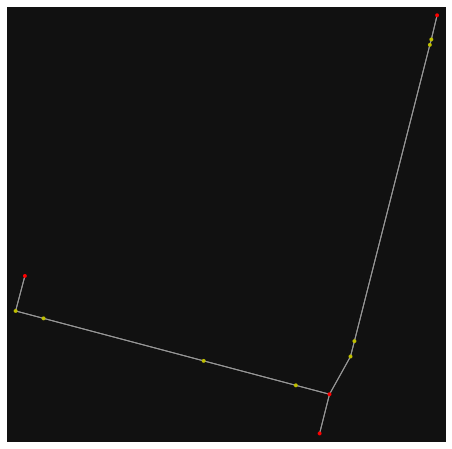

In [22]:
# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(highway_G, node) else "y" for node in highway_G.nodes()]
fig, ax = ox.plot_graph(highway_G, node_color=nc)

# 给POI node找到最近的路段，取出该POI node的Amenity类型 或者shop 类型
# 把node id，poi类型，边的node pair 存进一个DF
def find_edge_for_node(road_G,poi_G):
    for node in poi_G.nodes(data=True):

        print(gdf[gdf[osmid]==node[0]])
        #ed = ox.distance.nearest_edges(road_G, node[1]['x'], node[1]['y'])#,return_dist=True)
        #print(node,ed)


In [23]:
find_edge_for_node(highway_G,amenity_G)

NameError: name 'osmid' is not defined

In [ ]:
for edge in highway_G.edges(data=True):
    print(edge)